# Assignment15_Random forest(Company)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn import preprocessing

# 1 - Business Problem

A cloth manufacturing company is interested to know about the segment or attributes causes high sale

# 2 - Data collection and description

In [2]:
df = pd.read_csv("Company_Data.csv")
df1 = df.copy()
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [4]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df1.shape

(400, 11)

C:\Users\Shri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


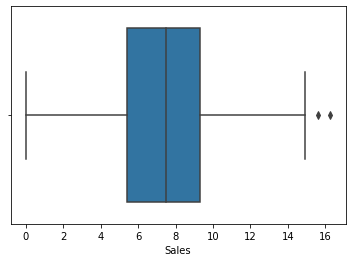

In [7]:
ax = sns.boxplot(df1['Sales'])  #Outlier Check

The data has 2 outlier instances

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


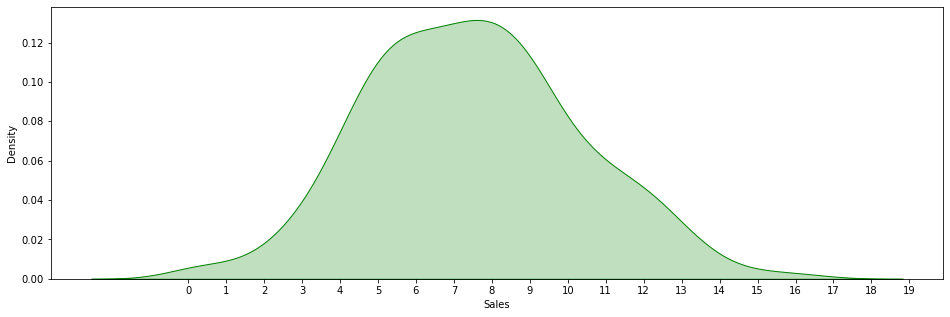

In [8]:
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

# The data is Skwed on the right
The data has negative Kurtosis

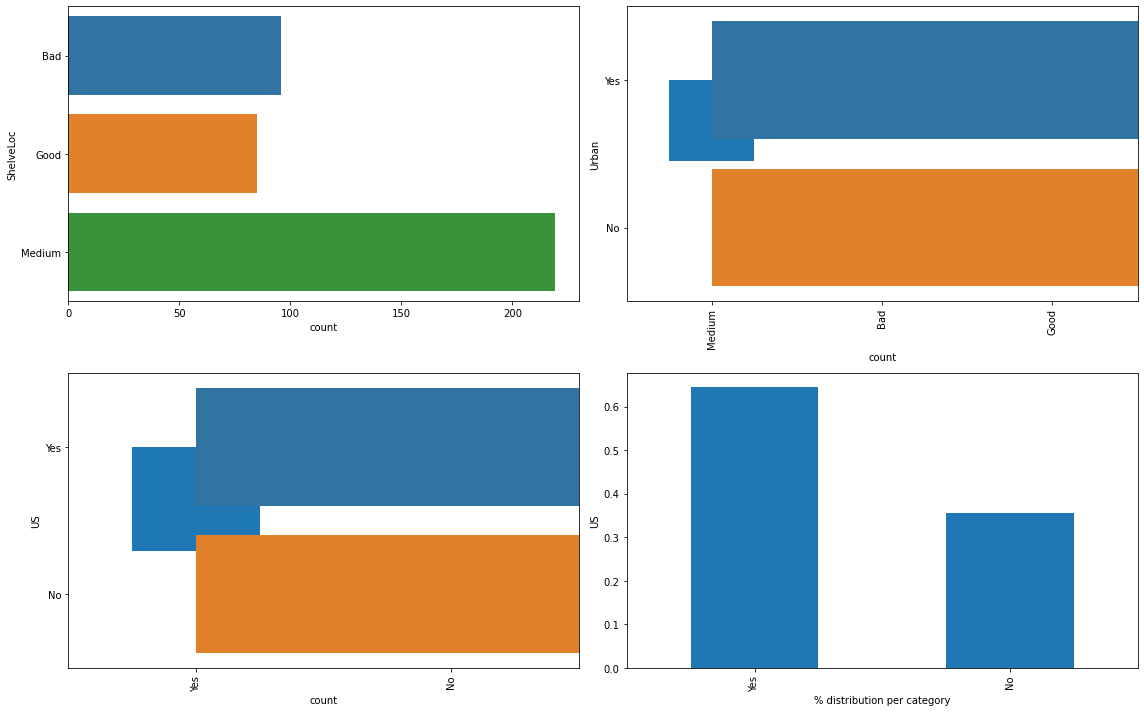

In [9]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

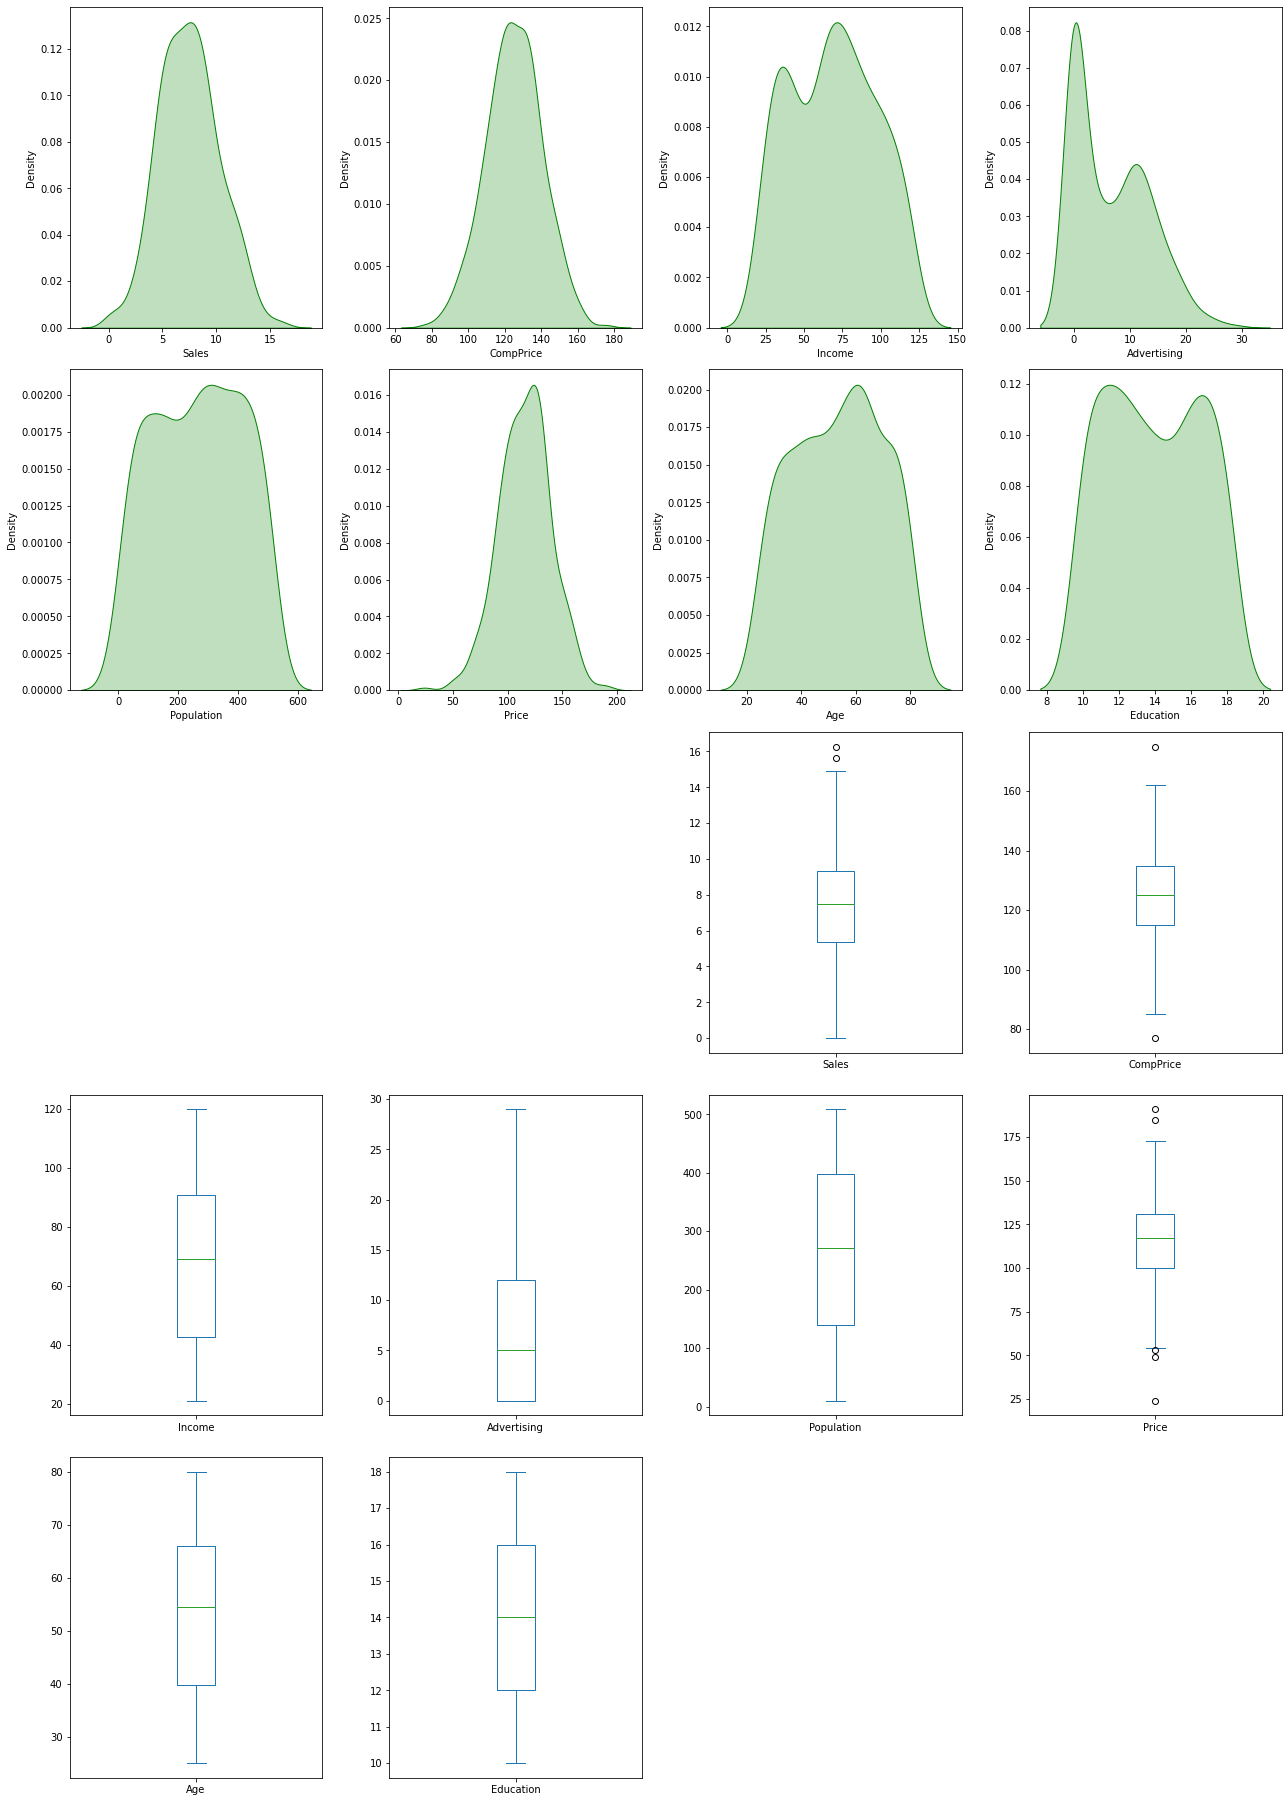

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [10]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])


<AxesSubplot:>

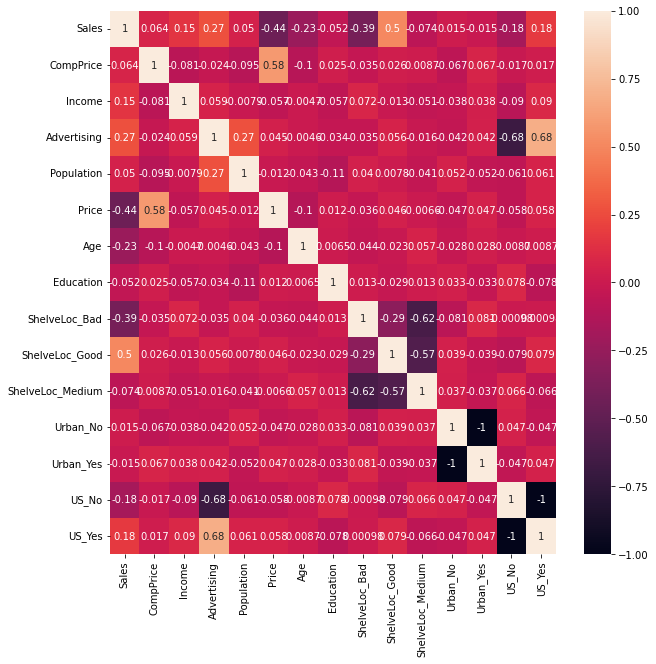

In [11]:
corr = df1.corr()
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# 3 -  Random Forest Model

Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [12]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [13]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.803125

In [14]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

1.0

In [15]:
confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]], dtype=int64)

In [16]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7625

In [17]:
confusion_matrix(y_test,pred_test)

array([[29, 11],
       [ 8, 32]], dtype=int64)

In [18]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
330,small,small
319,small,large
243,large,large
32,small,large
249,small,small
...,...,...
155,large,large
37,small,small
257,large,small
340,large,small


In [23]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium',
       'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes', 'sales'],
      dtype='object')

[Text(416.82331730769226, 524.1857142857143, 'Age <= 61.5\nentropy = 0.999\nsamples = 199\nvalue = [165, 155]\nclass = s'),
 Text(238.0889423076923, 485.3571428571429, 'US_Yes <= 0.5\nentropy = 0.969\nsamples = 129\nvalue = [129, 85]\nclass = s'),
 Text(131.45192307692307, 446.52857142857147, 'Age <= 55.5\nentropy = 0.99\nsamples = 47\nvalue = [33, 42]\nclass = a'),
 Text(91.21153846153845, 407.70000000000005, 'Population <= 340.5\nentropy = 0.964\nsamples = 41\nvalue = [26, 41]\nclass = a'),
 Text(42.92307692307692, 368.8714285714286, 'ShelveLoc_Bad <= 0.5\nentropy = 0.828\nsamples = 27\nvalue = [12, 34]\nclass = a'),
 Text(32.19230769230769, 330.0428571428572, 'Age <= 30.0\nentropy = 0.928\nsamples = 19\nvalue = [12, 23]\nclass = a'),
 Text(21.46153846153846, 291.2142857142857, 'entropy = 0.0\nsamples = 2\nvalue = [0, 4]\nclass = a'),
 Text(42.92307692307692, 291.2142857142857, 'Age <= 38.5\nentropy = 0.963\nsamples = 17\nvalue = [12, 19]\nclass = a'),
 Text(21.46153846153846, 252.38

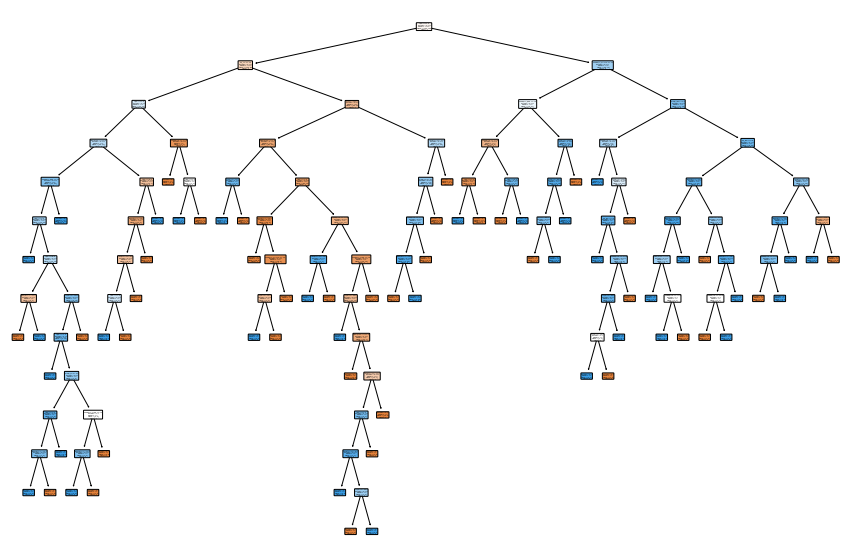

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

cols = list(df1.columns)
predictors = cols[0:14]
target = cols[14]

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[20], 
          feature_names=predictors,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)

In [29]:
fig.savefig('company_full.png')

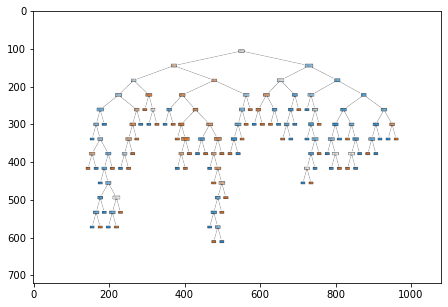

In [30]:
img = mpimg.imread('company_full.png') 
plt.imshow(img)

# 4 - Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 73%
As seen in the confusion matrix of Test data 59 instances are presdected correctly and 21 instances are not

[Text(418.5, 475.65000000000003, 'US_Yes <= 0.5\ngini = 0.498\nsamples = 209\nvalue = [170, 150]\nclass = s'),
 Text(209.25, 339.75, 'ShelveLoc_Bad <= 0.5\ngini = 0.477\nsamples = 72\nvalue = [44, 68]\nclass = a'),
 Text(104.625, 203.85000000000002, 'Price <= 102.5\ngini = 0.493\nsamples = 59\nvalue = [41, 52]\nclass = a'),
 Text(52.3125, 67.94999999999999, 'gini = 0.236\nsamples = 15\nvalue = [19, 3]\nclass = s'),
 Text(156.9375, 67.94999999999999, 'gini = 0.428\nsamples = 44\nvalue = [22, 49]\nclass = a'),
 Text(313.875, 203.85000000000002, 'Price <= 97.5\ngini = 0.266\nsamples = 13\nvalue = [3, 16]\nclass = a'),
 Text(261.5625, 67.94999999999999, 'gini = 0.375\nsamples = 3\nvalue = [3, 1]\nclass = s'),
 Text(366.1875, 67.94999999999999, 'gini = 0.0\nsamples = 10\nvalue = [0, 15]\nclass = a'),
 Text(627.75, 339.75, 'Education <= 13.5\ngini = 0.478\nsamples = 137\nvalue = [126, 82]\nclass = s'),
 Text(523.125, 203.85000000000002, 'ShelveLoc_Bad <= 0.5\ngini = 0.497\nsamples = 65\nvalu

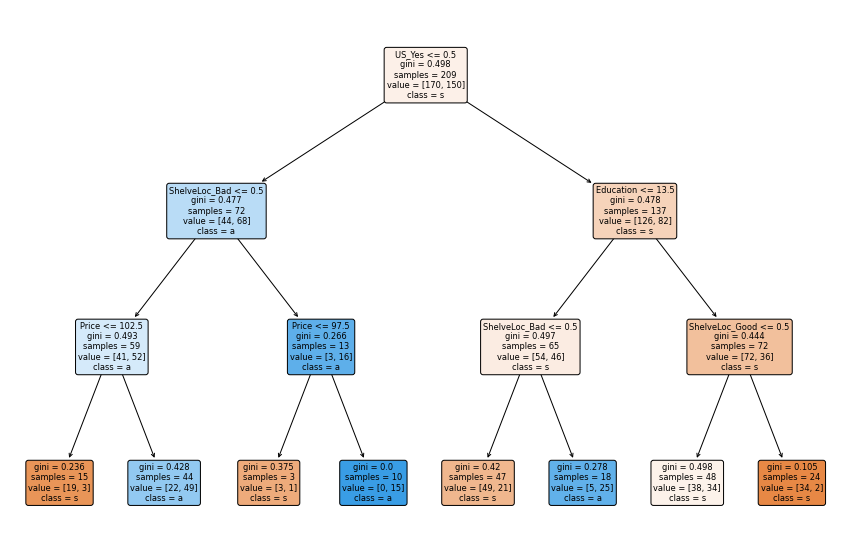

In [31]:
rf_small = RF(n_estimators=10, max_depth = 3)
rf_small.fit(x_train,y_train)
RF(max_depth=3, n_estimators=10)
tree_small = rf_small.estimators_[5]

fig = plt.figure(figsize=(15, 10))
plot_tree(tree_small, 
          feature_names=predictors,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)

In [32]:
fig.savefig('company_small.png')

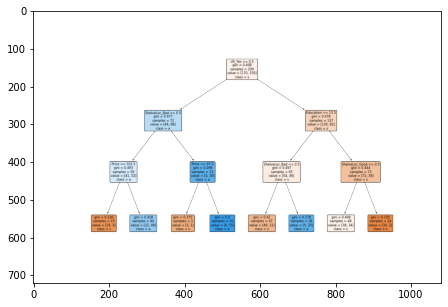

In [33]:
img = mpimg.imread('company_small.png') 
plt.imshow(img)

In [34]:
model.feature_importances_

array([0.11567759, 0.09227869, 0.11151617, 0.09147705, 0.22056822,
       0.12621219, 0.0579615 , 0.03802871, 0.07327848, 0.02450495,
       0.01214479, 0.0138741 , 0.01210695, 0.01037062])

In [35]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [36]:
fi

,feature,importance
4,Price,0.220568
5,Age,0.126212
0,CompPrice,0.115678
2,Advertising,0.111516
1,Income,0.092279
3,Population,0.091477
8,ShelveLoc_Good,0.073278
6,Education,0.057962
7,ShelveLoc_Bad,0.038029
9,ShelveLoc_Medium,0.024505


As seen in the above table Price is most important feature